In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import wrangle

# Acquire

In [2]:
df = pd.read_csv('allservicecalls.csv')

In [3]:
df.shape

(495440, 17)

# Prepare

In [4]:
df = wrangle.clean_311(df)
df.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,...,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10
2497,1014281655,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,...,0,0,0,0,0,1,0,0,0,0
2498,1014281665,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,...,0,0,0,0,0,1,0,0,0,0
2499,1014281677,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,...,0,0,0,0,0,1,0,0,0,0
2556,1014300321,2018-03-06,2020-09-24,2020-05-18,NO,Development Services,buildings,Street Light Existing Res Sub Div,Closed,Constituent Call,...,0,0,0,1,0,0,0,0,0,0
2657,1014326068,2018-03-14,2018-07-23,2020-05-27,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,...,0,0,0,1,0,0,0,0,0,0


In [5]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.split_separate_scale(df, stratify_by= None)
train.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,...,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10
246217,1016458740,2020-10-19,2021-03-09,2020-10-26,NO,Development Services,code,Property Maintenance (Low Hanging Limbs),Closed,Web Portal,...,1,0,0,0,0,0,0,0,0,0
392182,1016723470,2021-03-05,2021-03-09,2021-03-05,NO,Trans & Cap Improvements,streets,Pavement Repair (Pothole),Closed,Web Portal,...,0,0,0,0,0,0,0,0,1,0
435627,1016790902,2021-04-07,2021-04-12,2021-04-15,YES,Solid Waste Management,waste,No Pickup,Closed,Web Portal,...,0,1,0,0,0,0,0,0,0,0
184262,1016366962,2020-08-26,2020-10-30,2021-05-12,YES,Development Services,code,Overgrown Yard/Trash,Closed,Web Portal,...,0,0,0,0,0,0,0,0,0,1
373632,1016693055,2021-02-17,2021-02-18,2021-02-17,NO,Trans & Cap Improvements,traffic,Traffic Signals (Maintenance_Emergency),Closed,Web Portal,...,0,0,0,0,0,0,0,0,1,0


# Plan Out Explore

## Questions we want to answer

1. Is there a link to which form of reporting is responded to quickest and slowest?
2. Is the average number of calls in an area affect the response time?
3. Does the type of call in an area effect the level of delay? (Loose dog on the south side vs loose dog on the north side)
4. Does the specific location effect the delay time?
5. Does category/department affect response time?
6. Is response time for issue X different between geographical location Y when compared to the average response time? (or other geographical location?)
7. late_status and open_days by: zip code, department, source_id (Do different areas get better general service? Do different areas get better service depending on the department/issue?)Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
8. Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
9. Is there a difference in response time between districts?
10. What months or quarters of the year have the higherst volumn of calls? Does this impact how fast they respond?

### Lori's Questions
1. Is there a link to which form of reporting is responded to quickest and slowest?
3. Does the type of call in an area effect the level of delay? (Loose dog on the south side vs loose dog on the north side)

### Gabby's Questions
5. Does category/department affect response time?
6. Is response time for issue X different between geographical location Y when compared to the average response time? (or other geographical location?)

### Sam's Questions
7. late_status and open_days by: zip code, department, source_id (Do different areas get better general service? Do different areas get better service depending on the department/issue?)Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
8. Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)

### John's Questions
9. Is there a difference in response time between districts?
10. What months or quarters of the year have the higherst volumn of calls? Does this impact how fast they respond?

### Caitlyn's Questions
2. Is the average number of calls in an area affect the response time?
4. Does the specific location effect the delay time?

___

# Start Exploring

___

## Is the average number of calls in an area affect the response time?

### Game plan
- Use the following features in this exploratory analysis
    - zip code
    - council district
    - days_open
    - resolution_days_due
    - days_before_or_after_due
    - level_of_delay (Target)
- Look at the Univariate of each
    - Jot down thoughts, questions, and take aways
- Create bivariate plots seeing how each one plays into one anohter
- Create multivariate  plots

___

### Visualize the Distributions of the Target

___

## Univariate

#### Zipcode

___

#### Council District

<AxesSubplot:>

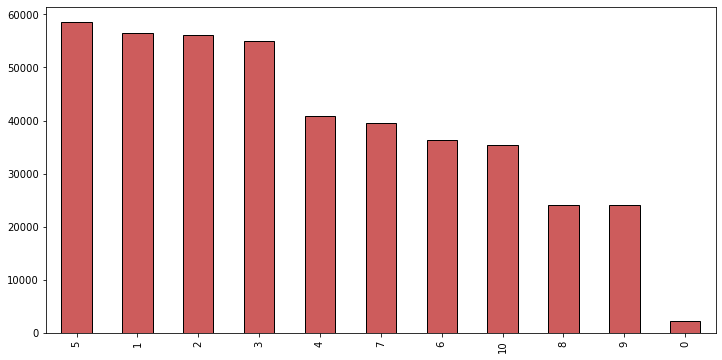

In [6]:
plt.figure(figsize=(12,6))
df['council_district'].value_counts().plot.bar(color='indianred', edgecolor='black')

### Takwaways:
- Districts 1, 2, 3, & 5 have higher reports
- District 0 has nearly no reports in comparison to the others
- 4, 6, 7, 8, 9, & 10 still have many reports but not as much as 1, 2, 3, and 5

<AxesSubplot:xlabel='council_district', ylabel='days_open'>

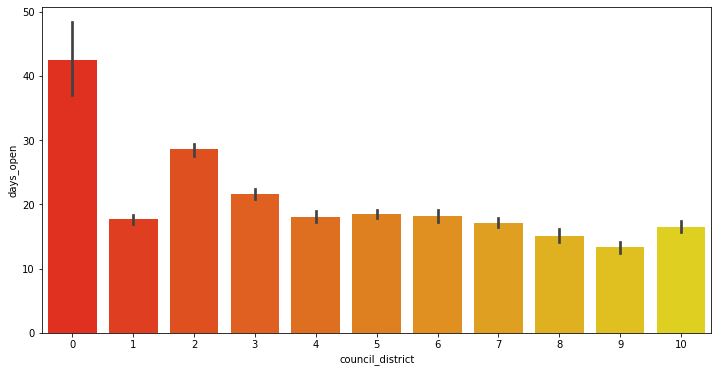

In [7]:
plt.figure(figsize=(12,6))
sns.barplot(data=train, x=train.council_district, y='days_open', palette='autumn')

<AxesSubplot:xlabel='council_district', ylabel='count'>

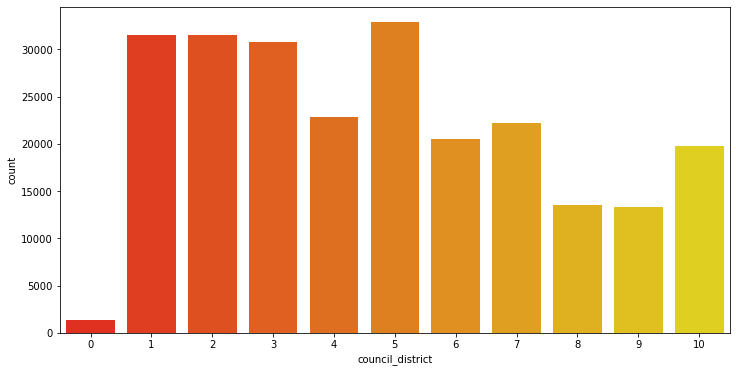

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data=train, x=train.council_district, palette='autumn')

## Takeaways:
- District has minimal amount of cases.


___

#### Days Open

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


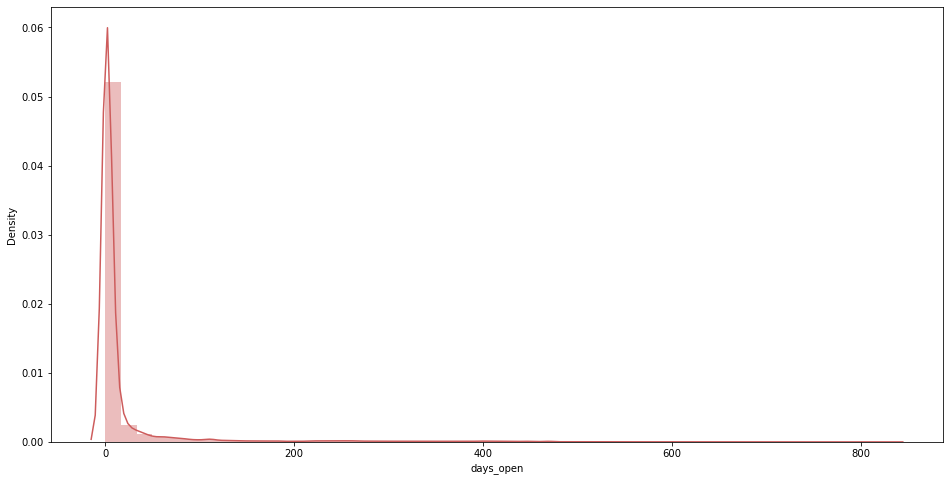

In [9]:
plt.figure(figsize=(16,8))
sns.distplot(df.days_open, color='indianred')
plt.show()

### Takeaways:
- definatly skewed right
- was worse before removing outliers over 1400 days
- not willing to remove any more for the ingrity of the data frame

___

#### Days Until Resolution is Due

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


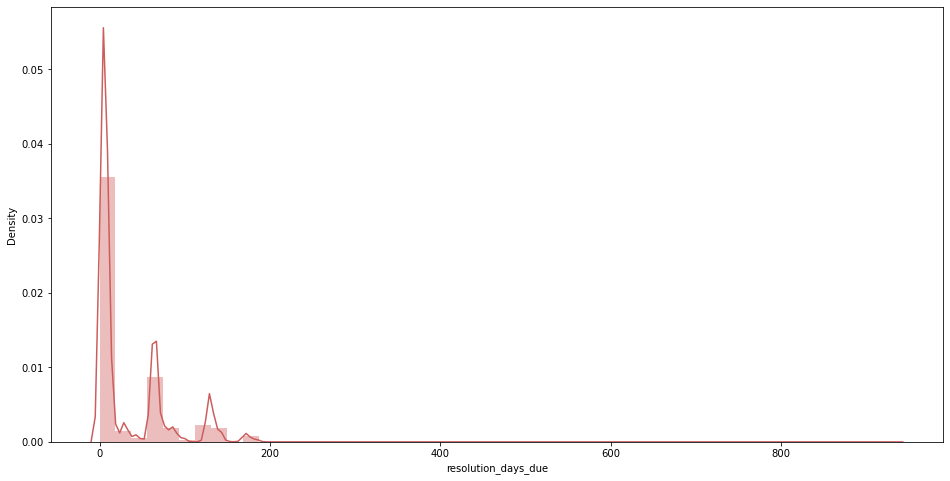

In [10]:
plt.figure(figsize=(16,8))
sns.distplot(df.resolution_days_due, color='indianred')
plt.show()

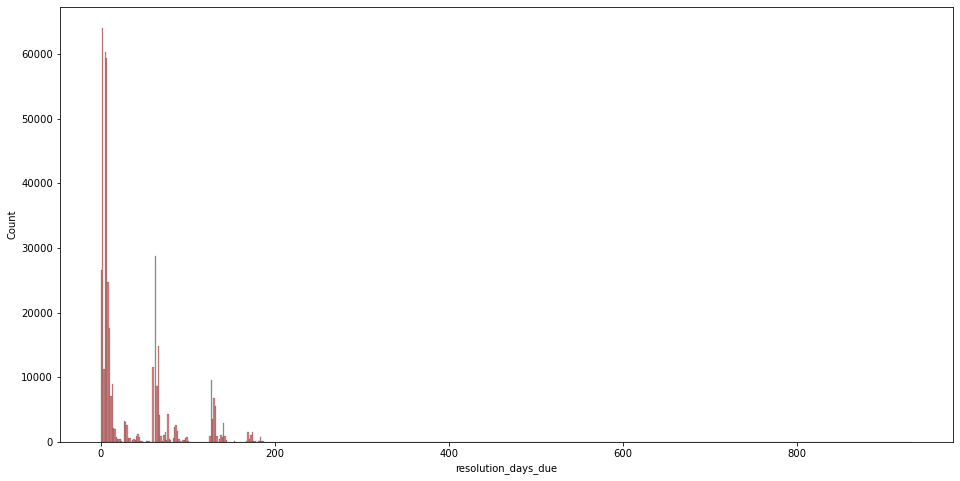

In [11]:
plt.figure(figsize=(16,8))
sns.histplot(df.resolution_days_due, color='indianred')
plt.show()

### Takeaways:
- Skewed right
- Can see a few different spikes but cant see where these are
    - all spikes are between 0 and 200 days open

___

#### Days Before or After Due Date the Resolution was Made

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


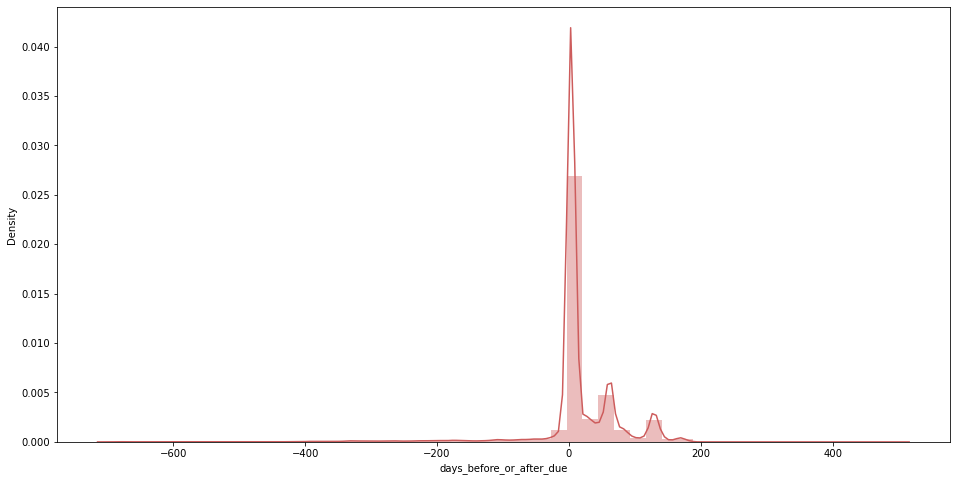

In [12]:
plt.figure(figsize=(16,8))
sns.distplot(df.days_before_or_after_due, color='indianred')
plt.show()

### Takeaways:
- There are more spikes in the casescompleted before due
- The later after the due date the more it trails off

___

## Bivariate

### Council District and Days Open

<AxesSubplot:xlabel='council_district', ylabel='count'>

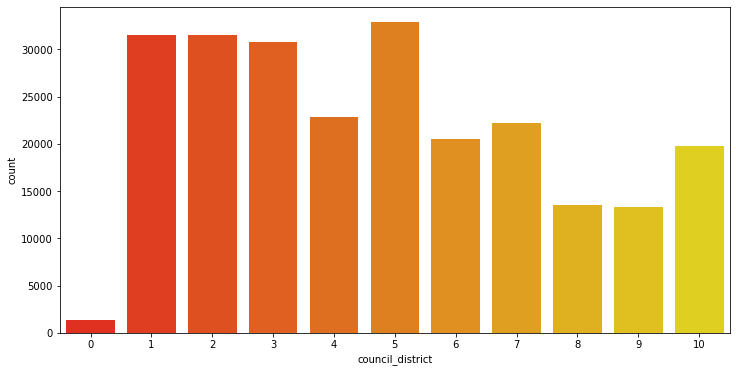

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(data=train, x=train.council_district, palette='autumn')

### Takeaways:
- ~42% of all days open are because of district 0
    - These are cases that did not happen in San Antonio
        - thank you Lori for finding that out
- District 1 and 9 are the 2 lowest when it comes to the number of days cases are open

<AxesSubplot:xlabel='council_district', ylabel='days_open'>

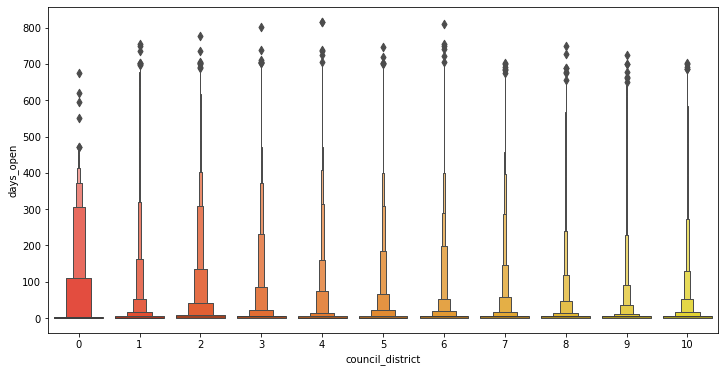

In [14]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=train, x=train.council_district, y=train.days_open, palette='autumn')

### Council District and Level of Delay

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428870 entries, 2497 to 495432
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   case_id                   428870 non-null  int64         
 1   open_date                 428870 non-null  datetime64[ns]
 2   due_date                  428870 non-null  datetime64[ns]
 3   closed_date               428870 non-null  datetime64[ns]
 4   is_late                   428870 non-null  object        
 5   dept                      428870 non-null  object        
 6   call_reason               428870 non-null  object        
 7   case_type                 428870 non-null  object        
 8   case_status               428870 non-null  object        
 9   source_id                 428870 non-null  object        
 10  address                   428870 non-null  object        
 11  council_district          428870 non-null  int64         
 12 

ValueError: num must be 1 <= num <= 10, not 11

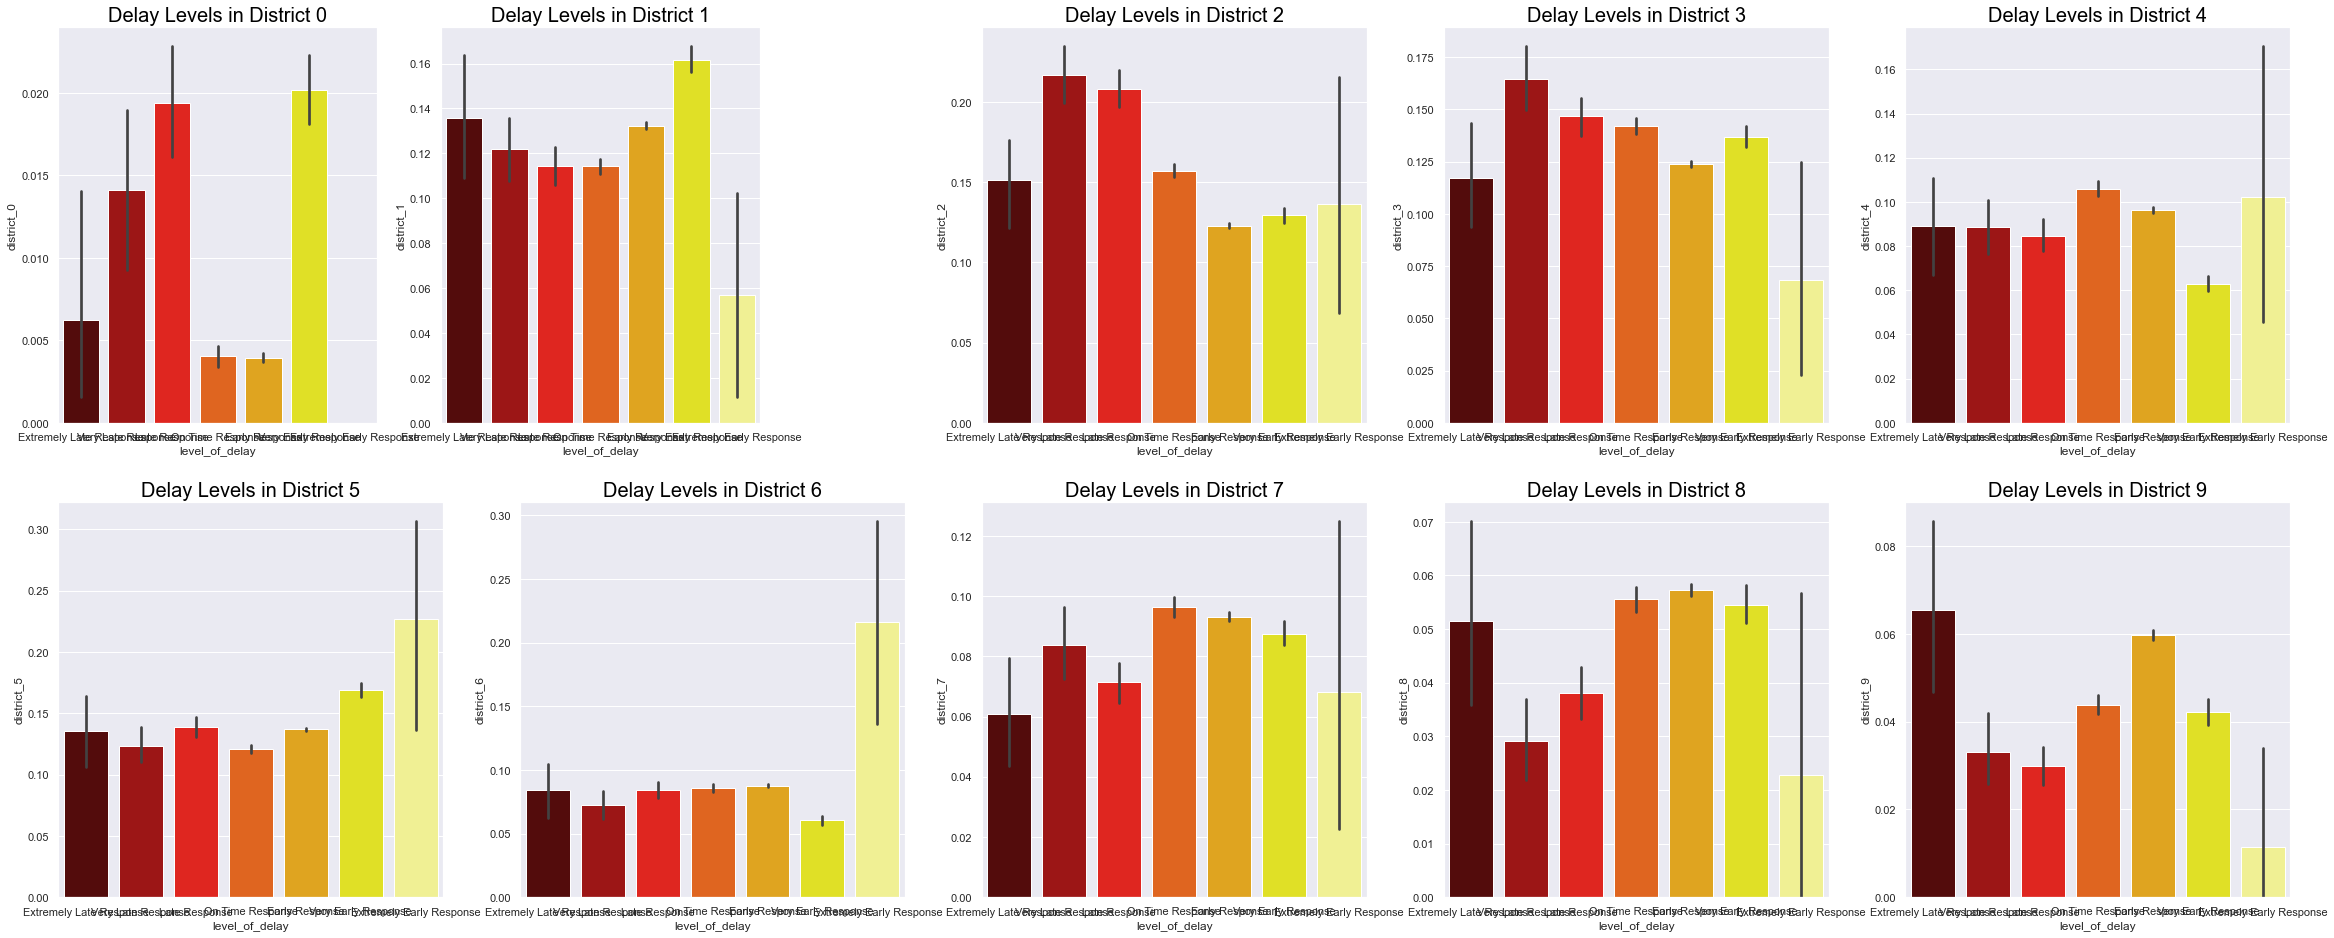

In [19]:
plt.subplots(2, 6, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,6,1)
plt.title("Delay Levels in District 0", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_0', data=train,
               palette='hot')

plt.subplot(2,6,2)
plt.title("Delay Levels in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_1', data=train,
               palette='hot')

plt.subplot(2,5,3)
plt.title("Delay Levels in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_2', data=train,
               palette='hot')

plt.subplot(2,5,4)
plt.title("Delay Levels in District 3", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_3', data=train,
               palette='hot')

plt.subplot(2,5,5)
plt.title("Delay Levels in District 4", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_4', data=train,
               palette='hot')

plt.subplot(2,5,6)
plt.title("Delay Levels in District 5", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_5', data=train,
               palette='hot')

plt.subplot(2,5,7)
plt.title("Delay Levels in District 6", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_6', data=train,
               palette='hot')

plt.subplot(2,5,8)
plt.title("Delay Levels in District 7", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_7', data=train,
               palette='hot')

plt.subplot(2,5,9)
plt.title("Delay Levels in District 8", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_8', data=train,
               palette='hot')

plt.subplot(2,5,10)
plt.title("Delay Levels in District 9", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_9', data=train,
               palette='hot')

plt.subplot(2,5,11)
plt.title("Delay Levels in District 10", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_10', data=train,
               palette='hot')

### Takeaways:
- 

___

    - zip code
    - council district
    - days_open
    - resolution_days_due
    - days_before_or_after_due
    - level_of_delay